In [1]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

A:\Miniconda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Read COCO JSON File
file = open('./dog_annotations_coco.json')
data = json.load(file)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [3]:
#Extract Details
image_details = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotation_details = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())

In [4]:
image_details.head()

,id,width,height,file_name,license,date_captured
0,0,100,100,2.jpg,1,
1,1,183,234,3.jpg,1,
2,2,231,218,4.jpg,1,
3,3,100,100,5.jpg,1,
4,4,259,194,6.jpg,1,


In [5]:
annotation_details.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,0,0,1,"[5, 14, 59, 14, 59, 100, 5, 100]",4644,"[5, 14, 54, 86]",0
1,1,1,1,"[22, 6, 172, 6, 172, 229, 22, 229]",33450,"[22, 6, 150, 223]",0
2,2,2,1,"[47, 13, 200, 13, 200, 202, 47, 202]",28917,"[47, 13, 153, 189]",0
3,3,3,1,"[59, 2, 98, 2, 98, 99, 59, 99]",3783,"[59, 2, 39, 97]",0
4,4,4,1,"[46, 10, 253, 10, 253, 189, 46, 189]",37053,"[46, 10, 207, 179]",0


In [6]:
#Extract the Box Dimensions
BBox_df = pd.concat([image_details, annotation_details], 1)[['file_name', 'width', 'height', 'bbox']]
x_list = []
y_list = []
w_list = []
h_list = [] 
for row in range(BBox_df.shape[0]):
  x = BBox_df['bbox'][row][0]
  y = BBox_df['bbox'][row][1]
  w = BBox_df['bbox'][row][2]
  h = BBox_df['bbox'][row][3]
  x_list.append(x)
  y_list.append(y)
  w_list.append(w)
  h_list.append(h)
box_df = pd.DataFrame(list(zip(x_list, y_list, w_list, h_list)), columns =['x', 'y', 'box_width', 'box_height'])
BBox_df = pd.concat([BBox_df, box_df], 1)
BBox_df = BBox_df.drop('bbox', axis =1)

In [7]:
BBox_df.head()

,file_name,width,height,x,y,box_width,box_height
0,2.jpg,100,100,5,14,54,86
1,3.jpg,183,234,22,6,150,223
2,4.jpg,231,218,47,13,153,189
3,5.jpg,100,100,59,2,39,97
4,6.jpg,259,194,46,10,207,179


In [8]:
#Normalize the Box Dimensions based on Image Height and Width
BBox_df['x'] = BBox_df['x'] / BBox_df['width']
BBox_df['y'] = BBox_df['y'] / BBox_df['height']
BBox_df['box_width'] = BBox_df['box_width'] / BBox_df['width']
BBox_df['box_height'] = BBox_df['box_height'] / BBox_df['height']

In [9]:
hw_array = BBox_df[["box_width", "box_height"]].to_numpy()
hw_array.shape

(57, 2)

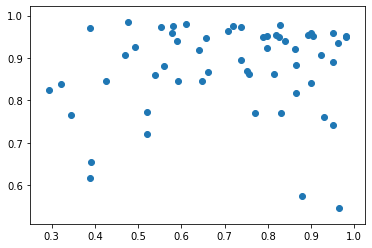

In [10]:
plt.scatter(hw_array[:,0], hw_array[:,1])

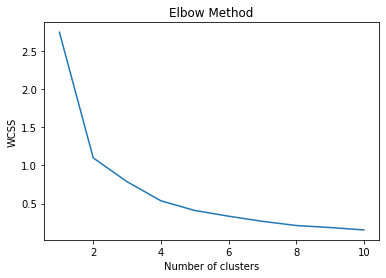

In [11]:
#Elbow Method
#Determine the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(hw_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# find cluster centers for selected number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)

In [13]:
# Cluster centers
kmeans.cluster_centers_

array([[0.53625708, 0.93315151],
       [0.89724256, 0.92583085],
       [0.91102838, 0.67885552],
       [0.40138336, 0.75517773],
       [0.73277736, 0.90494992]])

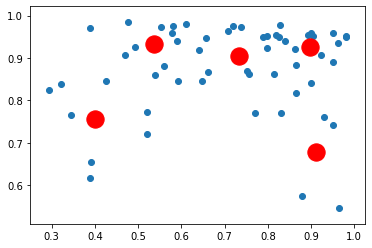

In [14]:
plt.scatter(hw_array[:,0], hw_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()